In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime, timedelta

import random

In [2]:
# 데이터 불러오기
plant1 = pd.read_csv('plant1_train_merge.csv')
plant2 = pd.read_csv('plant2_train_merge.csv')
test =  pd.read_csv('test.csv', index_col=0)

# 결측행 제거
plant1_notnull = plant1.dropna(how='any')
plant2_notnull = plant2.dropna(how='any')

In [3]:
# 1, 0 비율
print('loc1 value counts\n')
print(plant1['plant1_train.cond_loc1'].value_counts())
print(plant1_notnull['plant1_train.cond_loc1'].value_counts(),'\n\n')

print('loc2 value counts\n')
print(plant1['plant1_train.cond_loc2'].value_counts())
print(plant1_notnull['plant1_train.cond_loc2'].value_counts(),'\n\n')

print('loc3 value counts\n')
print(plant1['plant1_train.cond_loc3'].value_counts())
print(plant1_notnull['plant1_train.cond_loc3'].value_counts(),'\n\n')

loc1 value counts

0.0    57604
1.0      275
Name: plant1_train.cond_loc1, dtype: int64
0.0    57579
1.0      275
Name: plant1_train.cond_loc1, dtype: int64 


loc2 value counts

0.0    58142
1.0      487
Name: plant1_train.cond_loc2, dtype: int64
0.0    57369
1.0      485
Name: plant1_train.cond_loc2, dtype: int64 


loc3 value counts

0.0    57959
1.0      645
Name: plant1_train.cond_loc3, dtype: int64
0.0    57226
1.0      628
Name: plant1_train.cond_loc3, dtype: int64 




In [4]:
# 이슬점 함수

def dewpoint(temp, humid):
    return ((243.12 *((17.62 * temp /(243.12 + temp))
                     + np.log(humid / 100.0))) / (17.62-((17.62 * temp / (243.12 + temp)) + np.log(humid/ 100.0))))

In [10]:
# plant1 학습 데이터셋

plant1_loc1_24 = plant1.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant1_loc2_24 = plant1.iloc[:,[0,4,5,6,10,11, 13, 17,18,16]]
plant1_loc3_24 = plant1.iloc[:,[0,7,8,9,10,11, 14, 17,18,16]]

plant1_loc1_48 = plant1.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant1_loc2_48 = plant1.iloc[:,[0,4,5,6,10,11, 13, 20,21,19]]
plant1_loc3_48 = plant1.iloc[:,[0,7,8,9,10,11, 14, 20,21,19]]

temp_df = plant1_loc1_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc1_24 = plant1_loc1_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc2_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc2_24 = plant1_loc2_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')
temp_df = plant1_loc3_24.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc3_24 = plant1_loc3_24.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_24')


temp_df = plant1_loc1_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc1_48 = plant1_loc1_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc2_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc2_48 = plant1_loc2_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')
temp_df = plant1_loc3_48.iloc[:,[0,1,2,3,4,5, 6]]
plant1_loc3_48 = plant1_loc3_48.merge(temp_df, how='outer',right_on='plant1_train.mea_ddhr', left_on='datetime_48')

plant1_loc1_24.dropna(how='any', inplace=True)
plant1_loc2_24.dropna(how='any', inplace=True)
plant1_loc3_24.dropna(how='any', inplace=True)
plant1_loc1_48.dropna(how='any', inplace=True)
plant1_loc2_48.dropna(how='any', inplace=True)
plant1_loc3_48.dropna(how='any', inplace=True)

plant1_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant1_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']

plant1_loc1_24['loc'] = 1
plant1_loc2_24['loc'] = 2
plant1_loc3_24['loc'] = 3
plant1_loc1_48['loc'] = 1
plant1_loc2_48['loc'] = 2
plant1_loc3_48['loc'] = 3

plant1_24 = pd.concat([plant1_loc1_24, plant1_loc2_24, plant1_loc3_24])
plant1_48 = pd.concat([plant1_loc1_48, plant1_loc2_48, plant1_loc3_48])

# plant2 학습 데이터셋

plant2_loc1_24 = plant2.iloc[:,[0,1,2,3,10,11, 12, 17,18,16]]
plant2_loc2_24 = plant2.iloc[:,[0,1,2,3,10,11, 13, 17,18,16]]
plant2_loc3_24 = plant2.iloc[:,[0,1,2,3,10,11, 14, 17,18,16]]

plant2_loc1_48 = plant2.iloc[:,[0,1,2,3,10,11, 12, 20,21,19]]
plant2_loc2_48 = plant2.iloc[:,[0,1,2,3,10,11, 13, 20,21,19]]
plant2_loc3_48 = plant2.iloc[:,[0,1,2,3,10,11, 14, 20,21,19]]

temp_df = plant2_loc1_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc1_24 = plant2_loc1_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc2_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc2_24 = plant2_loc2_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')
temp_df = plant2_loc3_24.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc3_24 = plant2_loc3_24.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_24')

temp_df = plant2_loc1_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc1_48 = plant2_loc1_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc2_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc2_48 = plant2_loc2_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')
temp_df = plant2_loc3_48.iloc[:,[0,1,2,3,4,5, 6]]
plant2_loc3_48 = plant2_loc3_48.merge(temp_df, how='outer',right_on='plant2_train.mea_ddhr', left_on='datetime_48')

plant2_loc1_24.dropna(how='any', inplace=True)
plant2_loc2_24.dropna(how='any', inplace=True)
plant2_loc3_24.dropna(how='any', inplace=True)
plant2_loc1_48.dropna(how='any', inplace=True)
plant2_loc2_48.dropna(how='any', inplace=True)
plant2_loc3_48.dropna(how='any', inplace=True)

plant2_loc1_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc2_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc3_24.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc1_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc2_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']
plant2_loc3_48.columns = ['today', 'temp_in', 'hum_in', 'temp_coil', 'temp_out', 'hum_out', 'target', 'temp_24', 'hum_24',
                          'datetime_24', 'nextday', 'temp_in_y', 'hum_in_y', 'temp_coil_y', 'temp_out_y', 'hum_out_y','target_y']

plant2_loc1_24['loc'] = 1
plant2_loc2_24['loc'] = 2
plant2_loc3_24['loc'] = 3
plant2_loc1_48['loc'] = 1
plant2_loc2_48['loc'] = 2
plant2_loc3_48['loc'] = 3

# LOC 병합
plant2_24 = pd.concat([plant2_loc1_24, plant2_loc2_24, plant2_loc3_24])
plant2_48 = pd.concat([plant2_loc1_48, plant2_loc2_48, plant2_loc3_48])

plant1_24['plant'] = 1
plant1_48['plant'] = 1

plant2_24['plant'] = 2
plant2_48['plant'] = 2

# plant 병합
plant_24 = pd.concat([plant1_24, plant2_24], ignore_index=True)
plant_24 = plant_24.sort_values('today').reset_index(drop=True)

plant_48 = pd.concat([plant1_48, plant2_48], ignore_index=True)
plant_48 = plant_48.sort_values('today').reset_index(drop=True)

In [19]:
plant_24['today'] = plant_24['today'].astype('datetime64')
plant_48['today'] = plant_48['today'].astype('datetime64')

month = []
day = []

for i in range(len(plant_24['today'])) :
    month.append(plant_24['today'][i].month)
    day.append(plant_24['today'][i].day)
    
plant_24['month'] = month
plant_24['day'] = day

month = []
day = []

for i in range(len(plant_48['today'])) :
    month.append(plant_48['today'][i].month)
    day.append(plant_48['today'][i].day)
    
plant_48['month'] = month
plant_48['day'] = day

# DNN 모델

In [12]:
from keras_tqdm import TQDMNotebookCallback
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization, Dropout

from keras.callbacks import EarlyStopping

from keras.models import load_model
from tensorflow.keras.models import load_model

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import classification_report, confusion_matrix

## 24h 모델

In [35]:
x = plant_24.iloc[:,[1,2,3,4,5,7,8]]
y = plant_24.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

In [225]:
print(train_x.shape)
print(train_y.shape)

(241819, 7)
(241819, 5)


In [226]:
# callback 함수
es = EarlyStopping(patience=20)
tqdm = TQDMNotebookCallback()

In [230]:
# DNN 모델
model = Sequential()
model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [235]:
model.evaluate(test_x, test_y, batch_size=4096)

103638/103638 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 4us/step


[16.72293100548641, 2.365368366241455]

# 환경예측 > 결로예측 > 검증

In [293]:
test_x = pd.read_csv('test_x.csv', index_col=0)
test_y = pd.read_csv('test_y.csv', index_col=0)

pred_y = model_24.predict(test_x)
pred_y

array([[23.685446, 58.312195, 22.406246, 19.620995, 68.765045],
       [20.377243, 35.535065, 17.253368, 17.960957, 39.07785 ],
       [11.258762, 41.22969 , 10.274924,  7.054474, 52.537746],
       ...,
       [27.705986, 63.055935, 29.97201 , 24.802002, 76.83323 ],
       [10.615252, 41.60607 ,  9.515888,  8.400966, 40.332554],
       [ 6.498707, 57.854336,  3.233567,  3.623381, 66.817795]],
      dtype=float32)

In [299]:
plt.figure(figsize=(15,10))
sns.scatterplot(range(len(res)),res[:,0])
sns.scatterplot(range(len(res)),res[:,1])
# sns.scatterplot(range(len(pred_y)),pred_y[:,0])
# sns.scatterplot(range(len(pred_y)),pred_y[:,0])
# sns.scatterplot(range(len(pred_y)),pred_y[:,0])

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 1080x720 with 0 Axes>

In [ ]:
label = pd.DataFrame(np.array(plant_24.iloc[test_y.index,16:]))
pred_y = pd.DataFrame(pred_y)

#['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']


res = pd.concat([pred_y, label], axis=1)
res.columns = ['temp_in', 'hum_in', 'temp_coil', 'temp_out','hum_out','target','loc','plant','month','day']
res_target = res[['target']]
res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil']]
res['dewpoint'] = dewpoint(res['temp_in'], res['hum_in'])
res['diff'] = res['temp_in'] - res['temp_coil']
res['dew_diff'] = np.where(
    res['dewpoint']>res['temp_coil'],
    np.where(res['dewpoint']<res['temp_in'],
             1,0),0)
# res['low_1'] = np.where(res['temp_coil'] - res['dewpoint'] >= 1,0,1)
res['low_1'] = res['temp_coil'] - res['dewpoint']

res = res[['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']]

pred_y_proba = tree_model.predict_proba(res)
pred_y_proba

pred_y = tree_model.predict(res)
pred_y

In [291]:
print(classification_report(res_target, pred_y))
print(confusion_matrix(res_target, pred_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.63      0.68      0.65       557

    accuracy                           1.00    103638
   macro avg       0.82      0.84      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102862    219]
 [   180    377]]


In [276]:
for i in range(10,80,1) :
    print('\n\n',i/100)
    print(classification_report(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))
    print(confusion_matrix(res_target, np.where(pred_y_proba[:,1]>i/100,1,0)))



 0.1
              precision    recall  f1-score   support

         0.0       1.00      0.30      0.46    103081
         1.0       0.01      0.99      0.02       557

    accuracy                           0.30    103638
   macro avg       0.50      0.65      0.24    103638
weighted avg       0.99      0.30      0.46    103638

[[30663 72418]
 [    4   553]]


 0.11
              precision    recall  f1-score   support

         0.0       1.00      0.36      0.53    103081
         1.0       0.01      0.99      0.02       557

    accuracy                           0.36    103638
   macro avg       0.50      0.68      0.27    103638
weighted avg       0.99      0.36      0.53    103638

[[37101 65980]
 [    4   553]]


 0.12
              precision    recall  f1-score   support

         0.0       1.00      0.39      0.57    103081
         1.0       0.01      0.99      0.02       557

    accuracy                           0.40    103638
   macro avg       0.50      0.69      0.29


[[102799    282]
 [   174    383]]


 0.33
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.58      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.81    103638
weighted avg       1.00      1.00      1.00    103638

[[102799    282]
 [   174    383]]


 0.34
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.58      0.69      0.63       557

    accuracy                           1.00    103638
   macro avg       0.79      0.84      0.81    103638
weighted avg       1.00      1.00      1.00    103638

[[102799    282]
 [   174    383]]


 0.35
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.58      0.69      0.63       557

    accuracy                           1.00    10363


[[102832    249]
 [   176    381]]


 0.56
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.60      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102832    249]
 [   176    381]]


 0.57
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.60      0.68      0.64       557

    accuracy                           1.00    103638
   macro avg       0.80      0.84      0.82    103638
weighted avg       1.00      1.00      1.00    103638

[[102832    249]
 [   176    381]]


 0.58
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.61      0.68      0.64       557

    accuracy                           1.00    10363


[[102891    190]
 [   183    374]]


 0.79
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103081
         1.0       0.66      0.67      0.67       557

    accuracy                           1.00    103638
   macro avg       0.83      0.83      0.83    103638
weighted avg       1.00      1.00      1.00    103638

[[102891    190]
 [   183    374]]


# ROC curve

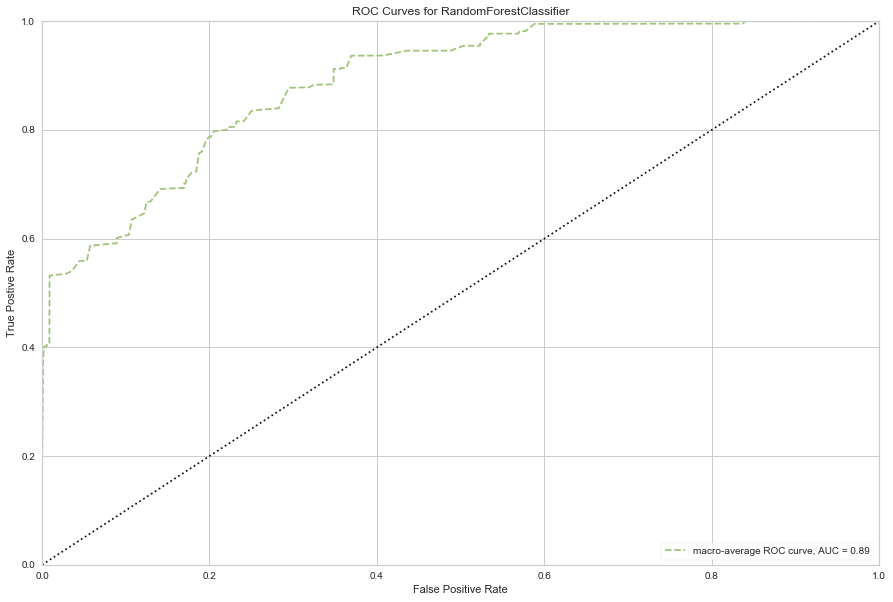

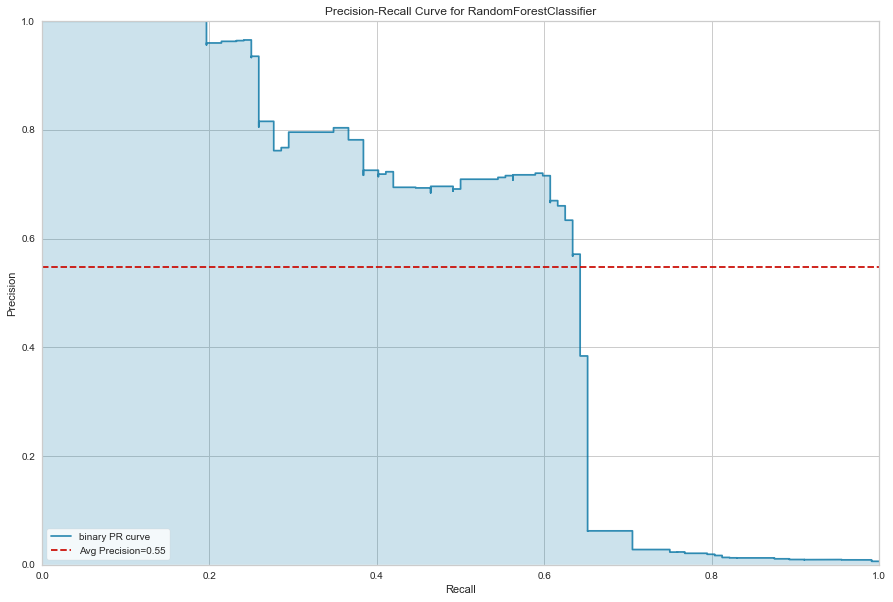

In [258]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(15,10))

X_train, X_test, y_train, y_test = train_test_split(res, res_target, test_size=0.20,
                                                    random_state=42)

visualizer = ROCAUC(tree_model, classes=[0, 1], micro=False, macro=True, per_class=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


from yellowbrick.classifier import PrecisionRecallCurve

plt.figure(figsize=(15,10))

viz = PrecisionRecallCurve(tree_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [232]:
# model.save('24h(2.365).h5')

## 48h 모델

In [130]:
x = plant_48.iloc[:,[1,2,3,4,5,7,8]]
y = plant_48.iloc[:,[11,12,13,14,15]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=777)

print(train_x.shape)  # (240931, 7)
print(train_y.shape)  # (240931, 5)

(240931, 7)
(240931, 5)


In [135]:
# callback 함수
es = EarlyStopping(patience=30)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=256, activation='relu',input_dim=7))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

hist = model.fit(train_x, train_y, epochs=600, batch_size=4096, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

In [127]:
model.evaluate(test_x, test_y, batch_size=4096)

103257/103257 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 4us/step


[18.71859766072211, 2.4824700355529785]

In [ ]:
# model.save('48h(2.47).h5')

# 공장환경 예측모델 load

In [15]:
# 모델 load
model_24 = load_model('24h(2.371).h5')
model_48 = load_model('48h(2.47).h5')

# 결로 예측 모델

In [21]:
plant_24.iloc[:,[1,2,3,4,5,6,7,16,17,18,19,20]]

,temp_in,hum_in,temp_coil,temp_out,hum_out,target,temp_24,target_y,loc,plant,month,day
0,16.00,24.00,11.00,9.00,42.0,0.0,9.1,0.0,1,1,4,1
1,13.00,32.00,10.00,9.00,42.0,0.0,9.1,0.0,3,1,4,1
2,14.00,23.00,11.00,9.00,42.0,0.0,9.1,0.0,2,1,4,1
3,12.00,32.00,9.00,7.00,59.0,0.0,7.1,0.0,2,1,4,1
4,11.00,42.00,7.00,7.00,59.0,0.0,7.1,0.0,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
345452,9.51,51.53,9.22,5.21,71.7,0.0,3.0,0.0,1,2,3,30
345453,9.51,51.53,9.22,5.21,71.7,0.0,3.0,0.0,3,2,3,30
345454,10.09,54.58,10.56,6.49,63.1,0.0,3.0,0.0,1,1,3,30
345455,10.52,52.32,11.43,6.49,63.1,0.0,3.0,0.0,2,1,3,30


In [285]:
condensation_data = plant_24.iloc[:,[1,2,3,4,5,6,7,16,17,18,19,20]]

condensation_data = condensation_data.reset_index(drop=True)
condensation_data = condensation_data[['month','day','plant','loc','temp_in','hum_in','temp_coil','target',]]

# condensation_data.to_csv('condensation_data.csv')

condensation_data['dewpoint'] = dewpoint(condensation_data['temp_in'], condensation_data['hum_in'])
condensation_data['diff'] = condensation_data['temp_in'] - condensation_data['temp_coil']

condensation_data['dew_diff'] = np.where(
    condensation_data['dewpoint']>condensation_data['temp_coil'],
    np.where(condensation_data['dewpoint']<condensation_data['temp_in'],
             1,0),0)

# condensation_data['low_1'] = np.where(condensation_data['temp_coil'] - condensation_data['dewpoint'] >= 1,0,1)
condensation_data['low_1'] = condensation_data['temp_coil'] - condensation_data['dewpoint']

condensation_data = condensation_data.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,7]]

# 전체 데이터셋 x,y 분리
condensation_data_x = condensation_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
condensation_data_y = condensation_data.iloc[:,[11]]

# 결로 1 값이 모두 들어간 데이터 샘플 
nag = condensation_data[condensation_data['target'] == 1]  # 1977
pos_index = random.sample(list(condensation_data[condensation_data['target'] == 0].index), 14023)
pos = condensation_data.iloc[pos_index, :]
condensation_sample = pd.concat([nag,pos])

# 셔플
condensation_sample = condensation_sample.sample(frac=1).reset_index(drop=True)

# x, y 분리
condensation_sample_x = condensation_sample.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
condensation_sample_y = condensation_sample.iloc[:,[11]]

In [286]:
# 전체 데이터셋 분리
# 정규화
# scaler = MinMaxScaler()
# condensation_data_x.iloc[:,4:] = scaler.fit_transform(condensation_data_x.iloc[:,4:])

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_data_x, condensation_data_y, test_size=0.3, random_state=77)  

In [168]:
# 샘플링한 데이터셋 분리
# 정규화
scaler = MinMaxScaler()
condensation_sample_x.iloc[:,4:] = scaler.fit_transform(condensation_sample_x.iloc[:,4:])

# 훈련셋, 검증셋
train_x, test_x, train_y, test_y = train_test_split(condensation_sample_x, condensation_sample_y, test_size=0.3, random_state=77)  

In [142]:
# callback 함수

es = EarlyStopping(patience=50)
tqdm = TQDMNotebookCallback()

model = Sequential()

model.add(Dense(units=32, activation='linear', input_dim=10))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))
model.add(Dense(units=64, activation='linear'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

hist = model.fit(train_x, train_y, epochs=1000, batch_size=210, validation_data=[test_x,test_y], verbose=0, callbacks=[es, tqdm]) 

# 검증 
pred_y = model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      4203
         1.0       1.00      0.01      0.01       597

    accuracy                           0.88      4800
   macro avg       0.94      0.50      0.47      4800
weighted avg       0.89      0.88      0.82      4800

[[4203    0]
 [ 593    4]]


# 의사결정트리 모델

In [24]:
import mglearn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [287]:
tree_model = DecisionTreeClassifier(random_state=777, max_depth=6)
tree_model.fit(train_x, train_y)
    
print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))

# 검증
print('\n학습 데이터 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000
특성 중요도:
[7.06247819e-04 1.22285210e-03 3.49463544e-02 7.20333534e-02
 4.37057990e-03 3.49250820e-03 1.73616118e-03 5.35202350e-03
 6.93972945e-03 0.00000000e+00 8.69200190e-01]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']

학습 데이터 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.98      0.95      0.97       608

    accuracy                           1.00    103638
   macro avg       0.99      0.98      0.98    103638
weighted avg       1.00      1.00      1.00    103638

[[103019     11]
 [    28    580]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    343480
         1.0       0.98      0.97      0.98      1977

    accuracy                           1.00    345457
   macro avg       0.99      0.99      0.99    345457
weighted avg       1.

# 랜덤포레스트 모델

In [288]:
tree_model = RandomForestClassifier(n_estimators=70, max_leaf_nodes=32, random_state=777)
tree_model.fit(train_x, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_x, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_x, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

# 검증
print('\n학습 데이터의 test셋\n')
pred_y = tree_model.predict(test_x).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

print('\n전체 데이터셋\n')
pred_y = tree_model.predict(condensation_data_x).reshape(-1,).astype('int')
test__y = np.array(condensation_data_y).reshape(-1,)

print(classification_report(test__y, pred_y))
print(confusion_matrix(test__y, pred_y))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000
특성 중요도:
[0.00411237 0.00404231 0.02774733 0.03283623 0.00739359 0.12895855
 0.01089487 0.01619542 0.03038057 0.15440013 0.58303862]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']




학습 데이터의 test셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.98      0.95      0.97       608

    accuracy                           1.00    103638
   macro avg       0.99      0.98      0.98    103638
weighted avg       1.00      1.00      1.00    103638

[[103019     11]
 [    28    580]]

전체 데이터셋

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    343480
         1.0       0.99      0.96      0.97      1977

    accuracy                           1.00    345457
   macro avg       0.99      0.98      0.99    345457
weighted avg       1.00      1.00      1.00    345457

[[34345

# PCA 이용 랜덤포레스트

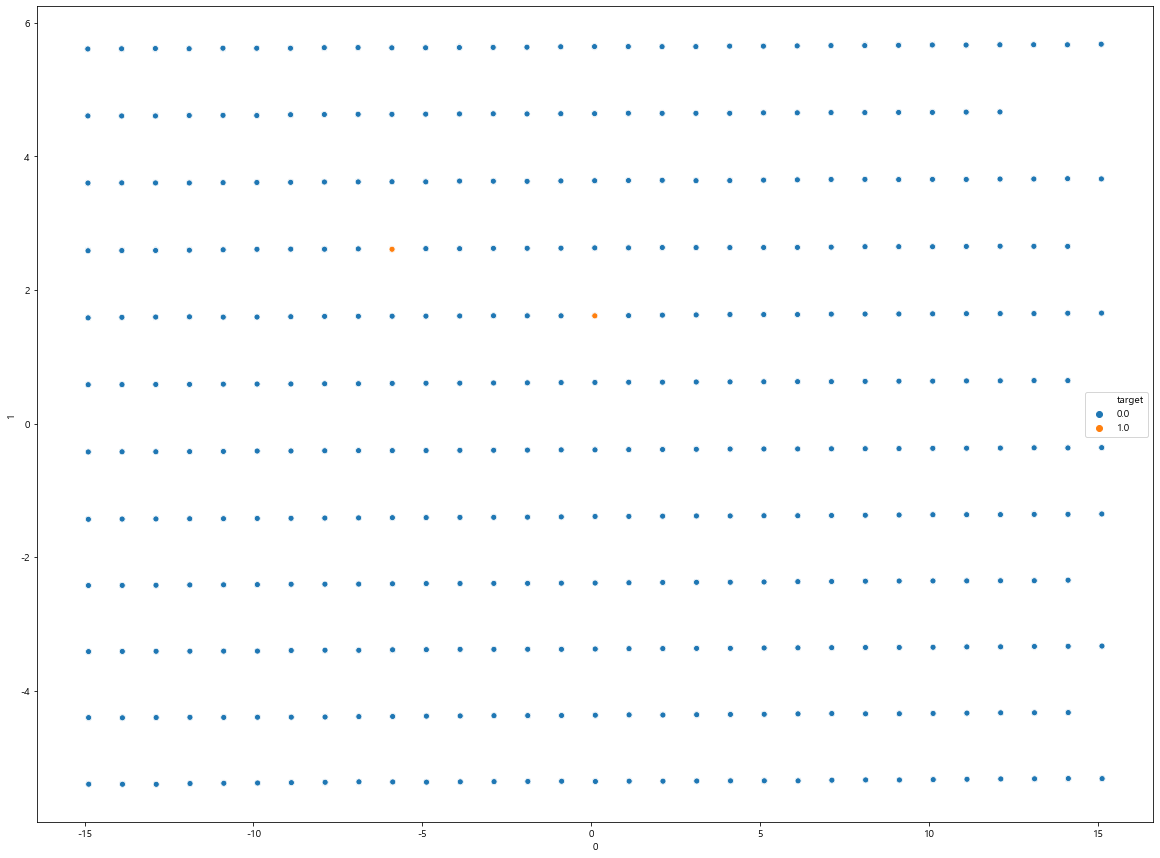

In [194]:
plt.figure(figsize=(20,15))

pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(condensation_data_x)
pca_df = pd.concat([pd.DataFrame(train_X2D), condensation_data_y], axis=1)

sns.scatterplot(data=pca_df, x=0, y=1, hue='target')

In [196]:
pca = PCA(n_components = 2)
train_X2D = pca.fit_transform(train_x.iloc[:,4:])
train_X2D
test_X2D = pca.fit_transform(test_x.iloc[:,4:])
test_X2D

tree_model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=7)
tree_model.fit(train_X2D, train_y)

print("훈련 세트 정확도: {:.3f}".format(tree_model.score(train_X2D, train_y)))
print("테스트 세트 정확도: {:.3f}".format(tree_model.score(test_X2D, test_y)))
print("특성 중요도:\n{}".format(tree_model.feature_importances_))
print(list(condensation_data_x.columns))
print('\n\n')

pred_y = tree_model.predict(test_X2D).reshape(-1,).astype('int')
test_y = np.array(test_y).reshape(-1,)

print(classification_report(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))

훈련 세트 정확도: 0.999
테스트 세트 정확도: 0.999
특성 중요도:
[0.04746921 0.95253079]
['month', 'day', 'plant', 'loc', 'temp_in', 'hum_in', 'temp_coil', 'dewpoint', 'diff', 'dew_diff', 'low_1']



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    103030
         1.0       0.87      0.92      0.89       608

    accuracy                           1.00    103638
   macro avg       0.93      0.96      0.95    103638
weighted avg       1.00      1.00      1.00    103638

[[102946     84]
 [    48    560]]


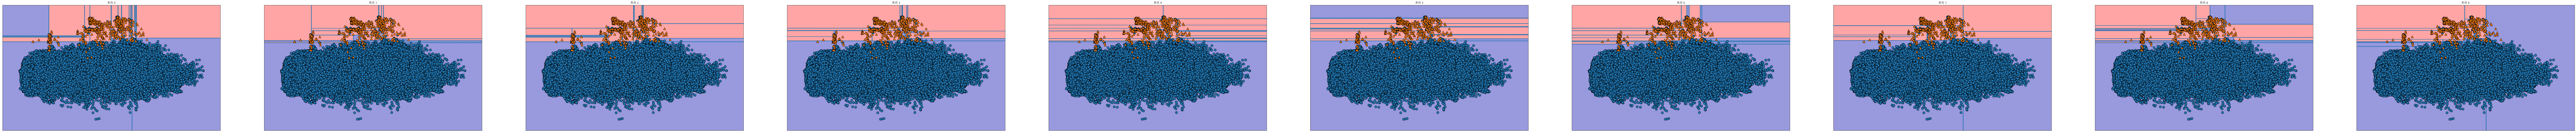

In [197]:
fig, axes = plt.subplots(1, 10, figsize=(200, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), tree_model.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(test_X2D, test_y, tree, ax=ax)

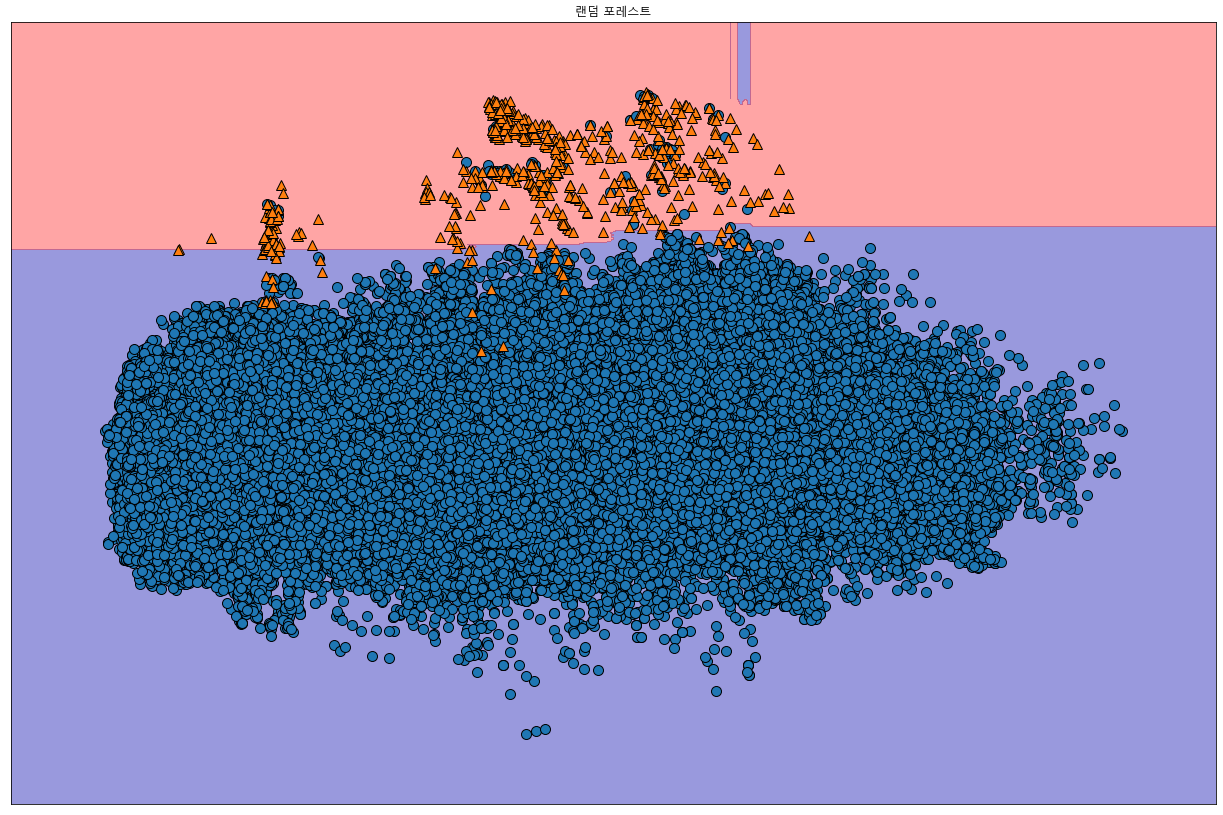

In [199]:
plt.figure(figsize=(10.80*2,7.20*2))
mglearn.plots.plot_2d_separator(tree_model, test_X2D, fill=True, alpha=.4)
plt.title("랜덤 포레스트")
mglearn.discrete_scatter(test_X2D[:, 0], test_X2D[:, 1], test_y)

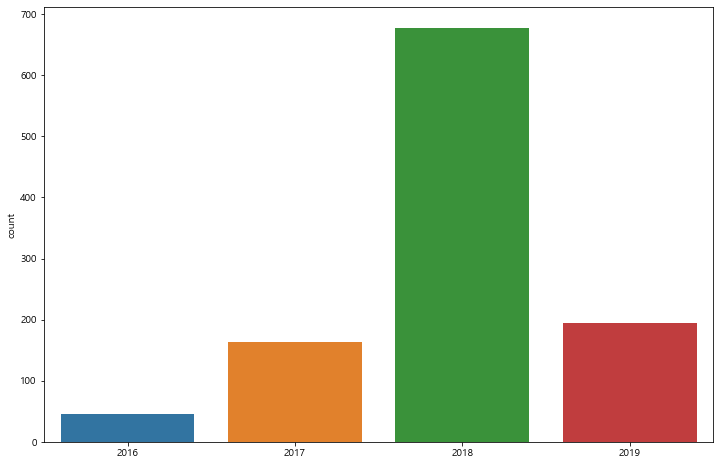

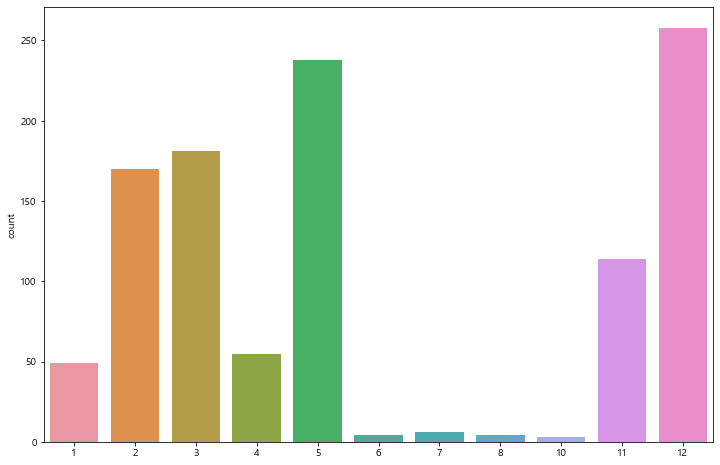

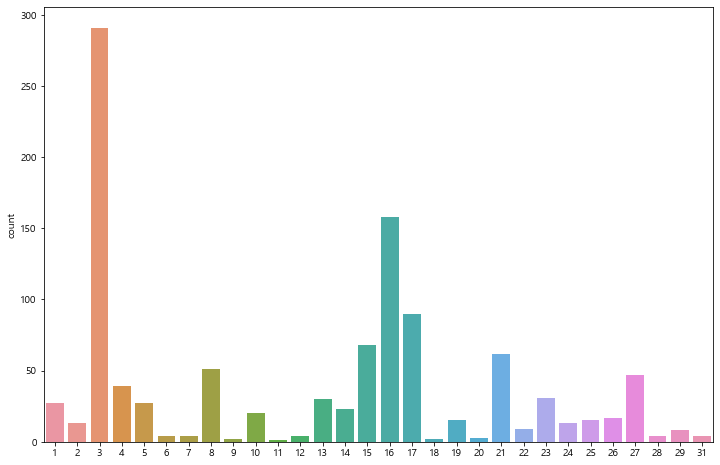

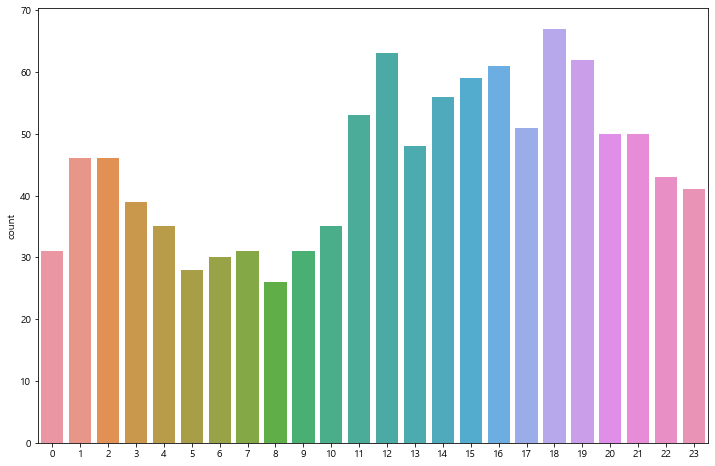

In [122]:
error = condensation_data[condensation_data['dewpoint'] < condensation_data['temp_coil']]
error = error[error['target'] == 1]

error = plant_24.iloc[error.index,:]
error['today'] = error['today'].astype('datetime64')

years = []
months = []
days = []
hours = []
for i in error['today'] :
    hours.append(i.hour)
    months.append(i.month)
    days.append(i.day)
    years.append(i.year)
    
plt.figure(figsize=(12,8))
sns.countplot(years)
# plt.savefig('year.png')

plt.figure(figsize=(12,8))
sns.countplot(months)
# plt.savefig('month.png')

plt.figure(figsize=(12,8))
sns.countplot(days)
# plt.savefig('day.png')

plt.figure(figsize=(12,8))
sns.countplot(hours)
# plt.savefig('hour.png')